In [15]:
#lab07-01
'''
learning rate: gradient descent optimizer에서 step을 얼마로 설정해줄 것인지 정하는 것
overshooting: learning rate가 너무 클때는 한 번에 step이 너무 커짐, 밖으로 빠져나갈지도
small learning rate: 너무 조금씩 step을 줌, 산을 타고 내려갈 때 조금조금 내려가면 해질때까지도 못내려가는 것처럼
learning rate를 너무 적게 주면 어느정도 내려가다가 멈추면 그게 최저가 아님에도 불구하고 최저라고 판단함.
learning rate에 너무 조금씩 step을 줘서 cost가 너무 작은 값으로 변한다 싶으면 좀 높여줘야 함.
'''
#tf.square(W): regularization하겠다.(overfitting을 방지하기 위함)

import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

#training set
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
#y_data는 one_hot으로 주어져있음
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#test set
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], 
                        feed_dict = {X: x_data, Y: y_data})
        print(step, cost_val, W_val)
        
    print("Prediction: ", sess.run(prediction, feed_dict = {X:x_test}))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: x_test, Y: y_test}))

0 8.545824 [[ 0.27378842  0.22246814  0.09797081]
 [ 0.35881877  0.02296349  0.08982889]
 [-1.5701909   0.92923474 -1.18008   ]]
1 6.416433 [[ 0.29833704  0.16069007  0.13520025]
 [ 0.52036655 -0.23800981  0.1892544 ]
 [-1.4081924   0.6800414  -1.0928851 ]]
2 4.3133945 [[ 0.32140112  0.10108462  0.1717416 ]
 [ 0.6784338  -0.49389404  0.28707144]
 [-1.2481923   0.433779   -1.0066229 ]]
3 2.3544178 [[ 0.33644518  0.0518955   0.20588665]
 [ 0.8041041  -0.70925105  0.37675816]
 [-1.1110885   0.21614704 -0.9260947 ]]
4 1.4295547 [[ 0.31779864  0.04255784  0.23387086]
 [ 0.74524564 -0.7113881   0.43775365]
 [-1.1365464   0.18737788 -0.8718677 ]]
5 1.3369031 [[ 0.3085873   0.03332054  0.25231948]
 [ 0.7381953  -0.71424943  0.44766533]
 [-1.1162302   0.15855277 -0.86335874]]
6 1.3177264 [[ 0.2981797   0.02796814  0.2680795 ]
 [ 0.7244256  -0.6965917   0.4437773 ]
 [-1.1032894   0.15017952 -0.8679263 ]]
7 1.3026255 [[ 0.28864327  0.02175138  0.28383267]
 [ 0.7148167  -0.6835948   0.44038936]
 [

92 0.7447977 [[-0.29015967 -0.3583539   1.2427409 ]
 [ 0.29050496 -0.01514423  0.19625038]
 [-0.41326204 -0.36654204 -1.041232  ]]
93 0.7425511 [[-0.29562038 -0.3608296   1.2506772 ]
 [ 0.2897063  -0.0125677   0.19447252]
 [-0.41023934 -0.36788872 -1.042908  ]]
94 0.74033886 [[-0.30106333 -0.36326867  1.2585592 ]
 [ 0.2889508  -0.01005574  0.19271605]
 [-0.40726775 -0.36918575 -1.0445825 ]]
95 0.73816025 [[-0.3064886  -0.3656717   1.2663875 ]
 [ 0.288237   -0.00760653  0.19098061]
 [-0.4043457  -0.37043485 -1.0462555 ]]
96 0.7360143 [[-0.31189632 -0.36803916  1.2741627 ]
 [ 0.2875634  -0.0052182   0.18926588]
 [-0.40147164 -0.37163758 -1.0479268 ]]
97 0.73390007 [[-0.31728655 -0.37037164  1.2818854 ]
 [ 0.2869286  -0.00288903  0.1875715 ]
 [-0.3986441  -0.37279558 -1.0495963 ]]
98 0.7318169 [[-3.2265940e-01 -3.7266964e-01  1.2895563e+00]
 [ 2.8633118e-01 -6.1722659e-04  1.8589711e-01]
 [-3.9586157e-01 -3.7391031e-01 -1.0512640e+00]]
99 0.72976345 [[-0.328015   -0.37493366  1.2971759 ]


183 0.61877024 [[-0.7259775  -0.48229814  1.8025029 ]
 [ 0.2901702   0.08862347  0.09281779]
 [-0.23718047 -0.40077603 -1.1830789 ]]
184 0.61788094 [[-0.7302079  -0.4829114   1.8073466 ]
 [ 0.29038042  0.08911635  0.09211469]
 [-0.23570268 -0.4008274  -1.1845053 ]]
185 0.6169977 [[-0.73442876 -0.48351422  1.8121703 ]
 [ 0.2905899   0.08960377  0.0914178 ]
 [-0.23422827 -0.40087813 -1.1859291 ]]
186 0.6161206 [[-0.7386401  -0.48410666  1.816974  ]
 [ 0.2907985   0.09008598  0.09072702]
 [-0.23275726 -0.40092814 -1.18735   ]]
187 0.6152494 [[-0.742842   -0.48468888  1.8217582 ]
 [ 0.29100627  0.09056293  0.09004229]
 [-0.23128942 -0.40097764 -1.1887684 ]]
188 0.6143842 [[-0.74703455 -0.48526096  1.8265227 ]
 [ 0.29121307  0.0910349   0.08936354]
 [-0.22982486 -0.40102655 -1.190184  ]]
189 0.6135247 [[-0.7512177  -0.48582307  1.831268  ]
 [ 0.29141897  0.09150183  0.08869071]
 [-0.22836335 -0.40107507 -1.191597  ]]
190 0.612671 [[-0.75539166 -0.48637527  1.8359941 ]
 [ 0.29162383  0.09196

In [20]:
#밖으로 튕겨나가는 경우, 학습을 포기
#cost에 nan이 나오면 learning_rate가 너무 큰 것은 아닌지 봐야 함.
#training set
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
#y_data는 one_hot으로 주어져있음
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#test set
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1.5).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], 
                                      feed_dict = {X: x_data, Y: y_data})
        print(step, cost_val, W_val)
    
    print('Prediction: ', sess.run(prediction, feed_dict = {X: x_test}))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: x_test, Y: y_test}))

0 5.4381795 [[-1.5684046  -0.47728956 -1.35927   ]
 [-2.8842747   1.743624    0.78208756]
 [-4.34633     1.1646693  -0.20346165]]
1 18.240692 [[-1.1934046  -1.37761    -0.83394945]
 [-0.44677472 -2.1154163   2.2036278 ]
 [-1.9088302  -2.5428674   1.0665748 ]]
2 25.93694 [[-0.818407   -0.81510997 -1.7714471 ]
 [ 1.9907203   0.5095837  -2.8588674 ]
 [ 0.52866745  0.26963258 -4.183423  ]]
3 12.384337 [[-1.9398863  -0.25613046 -1.2089472 ]
 [-2.1265965   3.1269007  -1.3588676 ]
 [-3.5886488   3.0744486  -2.8709233 ]]
4 28.981215 [[-1.5648863  -1.1936301  -0.6464475 ]
 [ 0.31090355 -0.8105986   0.14113164]
 [-1.1511488  -0.67555094 -1.5584236 ]]
5 2.1016626 [[-1.5087432  -0.6558883  -1.2403324 ]
 [ 0.96140885  1.7511358  -3.0711076 ]
 [-0.4729234   2.0187256  -4.9309254 ]]
6 15.473864 [[-1.13582   -1.5913115 -0.6778325]
 [ 3.3946784 -2.1821337 -1.5711079]
 [ 1.9624218 -1.7291193 -3.6184254]]
7 26.147543 [[-2.2608192  -1.0288115  -0.11533332]
 [-0.7303202   0.44286633 -0.07110953]
 [-2.16257

155 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
156 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
157 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
158 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
159 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
160 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
161 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
162 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
163 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
164 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
165 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
166 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
167 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
168 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
169 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
170 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
171 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
172 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
173 nan [[nan nan nan]
 [nan

In [27]:
#small learning rate인 경우 local minima에 빠져서 나오지 못함.
#training set
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
#y_data는 one_hot으로 주어져있음
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#test set
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-10).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    print('Prediction: ', sess.run(prediction, feed_dict = {X: x_test}))
    print('Accuracy: ', sess.run(accuracy, feed_dict= {X: x_test, Y: y_test}))
    

0 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
1 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
2 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
3 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
4 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
5 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
6 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
7 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]


87 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
88 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
89 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
90 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
91 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
92 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
93 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
94 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.14

165 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
166 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
167 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
168 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
169 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
170 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
171 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.0694239  -1.1472123 ]
 [ 0.57059914  0.51232064  0.11380499]]
172 3.9474359 [[-0.38523248 -0.0960717  -1.6764985 ]
 [ 0.44569156 -1.069423

In [42]:
#MinMaxScalar함수: 정규화할 수 있음(min: 0, max: 1)

import tensorflow as tf
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_daya = xy[:, [-1]]

X = tf.placeholder('float', [None, 4])
Y = tf.placeholder('float', [None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(101):
        cost_val, hy_val, _ = sess.run(
            [cost, hypothesis, optimizer], feed_dict = {X: x_data, Y: y_data})
        print(step, "Cost: ", cost_val, '\nPrediction:\n', hy_val)

0 Cost:  2696877700000.0 
Prediction:
 [[1158700.2]
 [2333457.5]
 [1835468.6]
 [1286403.6]
 [1516243.8]
 [1529014.8]
 [1401331.2]
 [1784405.1]]
1 Cost:  2.9630066e+27 
Prediction:
 [[-3.8397024e+13]
 [-7.7297156e+13]
 [-6.0806884e+13]
 [-4.2625302e+13]
 [-5.0236194e+13]
 [-5.0659022e+13]
 [-4.6430748e+13]
 [-5.9115573e+13]]
2 Cost:  inf 
Prediction:
 [[1.2727211e+21]
 [2.5621184e+21]
 [2.0155259e+21]
 [1.4128729e+21]
 [1.6651463e+21]
 [1.6791615e+21]
 [1.5390096e+21]
 [1.9594653e+21]]
3 Cost:  inf 
Prediction:
 [[-4.2186061e+28]
 [-8.4924876e+28]
 [-6.6807328e+28]
 [-4.6831581e+28]
 [-5.5193522e+28]
 [-5.5658076e+28]
 [-5.1012552e+28]
 [-6.4949119e+28]]
4 Cost:  inf 
Prediction:
 [[1.3983138e+36]
 [2.8149490e+36]
 [2.2144191e+36]
 [1.5522960e+36]
 [1.8294638e+36]
 [1.8448620e+36]
 [1.6908798e+36]
 [2.1528261e+36]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]

In [47]:
import tensorflow as tf
import numpy as np


def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

xy = min_max_scaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder('float', [None, 4])
Y = tf.placeholder('float', [None, 1])
W = tf.Variable(tf.random_normal([4,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, optimizer], 
                                       feed_dict = {X: x_data, Y: y_data})
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  9.413631 
Prediction:
 [[3.8384354]
 [3.6957006]
 [3.5720372]
 [3.4605544]
 [3.5276406]
 [3.6094432]
 [3.3297431]
 [3.5008051]]
1 Cost:  9.41297 
Prediction:
 [[3.838291 ]
 [3.695557 ]
 [3.5719166]
 [3.4604595]
 [3.5275295]
 [3.6093357]
 [3.329667 ]
 [3.5007296]]
2 Cost:  9.41231 
Prediction:
 [[3.8381467]
 [3.6954138]
 [3.5717957]
 [3.4603646]
 [3.5274186]
 [3.6092281]
 [3.3295913]
 [3.5006537]]
3 Cost:  9.41165 
Prediction:
 [[3.8380024]
 [3.6952703]
 [3.571675 ]
 [3.4602695]
 [3.5273077]
 [3.6091206]
 [3.3295155]
 [3.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0001 cost =  3.127368403
Accuracy:  0.7513
Epoch:  0002 cost =  1.162718924
Accuracy:  0.8119
Epoch:  0003 cost =  0.905096177
Accuracy:  0.8352
Epoch:  0004 cost =  0.783722736
Accuracy:  0.8498
Epoch:  0005 cost =  0.710221513
Accuracy:  0.8587
Epoch:  0006 cost =  0.659093270
Accuracy:  0.8649
Epoch:  0007 cost =  0.620576099
Accuracy:  0.8692
Epoch:  0008 cost =  0.589756200
Accuracy:  0.8728
Epoch:  0009 cost =  0.564480219
Accuracy:  0.8755
Epoch:  0010 cost =  0.543443129
Accuracy:  0.8776
Epoch:  0011 cost =  0.525296722
Accuracy:  0.8795
Epoch:  0012 cost =  0.509535902
Accuracy:  0.8809
Epoch:  0013 cost =  0.495670841
Accuracy:  0.8822
Epoch:  0014 cost =  0.483791041
Accuracy:  0.8839
Epoch:  0015 cost =  0.472195948
Accuracy:  0.884
learning finished!
Label:  [8]
Prediction:

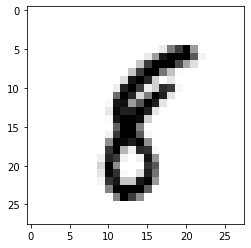

In [62]:
'''
mnist data

'''
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
#one_hot = True이면 별도로 one hot으로 처리하지 않아도 알아서 one hot으로 처리된다.

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])#28*28 = 784
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
#cross entropy
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
#정확한지 아닌지를 평가, one hot 값인 hypothesis와 y값을 비교
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#정확도

training_epochs = 15 
#전체 데이터셋을 한 번 다 학습시킨 것(한 번 다 돈 것)이 1 epoch
#학습 example이 1000개 있다, batch_size = 500이면 epoch = 2를 해야함
batch_size = 100
#데이터가 너무 많아서 한꺼번에 불러올 수는 없음
#조금씩 batch로 잘라서 학습시킴
#한 번에 몇 개씩을 잘라서 학습시킬까임

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch): #iteration
            #iteration을 몇 번 돌까? -> 전체 데이터수/batch_size
            '''
            전체 사이즈: 1000개, batch_size = 100이면
            몇 번 루프를 iteration하면 1 epoch이 되는가?
            100번을 돌면 1epoch을 돈다
            '''
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            #100개씩 읽어와서 학습을 시켜준다.
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        
        print('Epoch: ', '%04d' %(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

        print('Accuracy: ', accuracy.eval(session = sess,
                feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
        
    print('learning finished!')

    r = random.randint(0, mnist.test.num_examples - 1)
    print('Label: ', sess.run(tf.argmax(mnist.test.labels[r: r+1], 1)))
    print('Prediction: ', sess.run(tf.argmax(hypothesis, 1),
                                  feed_dict = {X: mnist.test.images[r: r+1]}))

    plt.imshow(mnist.test.images[r: r+1].
              reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')

    plt.show()
#c = random.randint(0, mnist.)